
# **HealthKart Intern Assignment**
# Influencer Campaigns

## Project Overview
## Objective:
Simulate influencer marketing campaign data for a multi-brand business (HealthKart) and enable ROI/ROAS (Return on Ad Spend) analytics to power a dashboard. The system tracks influencer activities, campaign outcomes, and financials across social media platforms.

### Data Modeling & Dataset Explanation
Four key datasets are simulated to reflect real-world

### influencer campaigns:

1. influencers: Basic details for each influencer.

    * id: Unique identifier

    * name: Influencer’s name

    * category: Content focus (e.g., Fitness, Beauty)

    * gender: Gender identity

    * follower_count: Number of followers

    * platform: Primary social platform

2. posts: Records of influencer posts about campaign products.

    * post_id: Unique post identifier

    * influencer_id: Owner influencer (links to influencers)

    * platform: Posting platform

    * date: Posting date

    * url: Post link or identifier

    * caption: Text/content of the post

    * reach: Estimated audience reached

    * likes: Likes received

    * comments: Comments received

3. tracking_data: Performance tracking of influencer-driven sales.

    * source: Campaign and brand context

    * campaign: Campaign identifier

    * influencer_id: Responsible influencer

    * user_id: Unique customer identifier

    * product: Product discussed

    * date: Conversion date

    * orders: Units ordered

    * revenue: Revenue generated

4. payouts: Tracks influencer compensation.

    * influencer_id: Related influencer

    * basis: Payment model (post or order)

    * rate: Amount paid per post or order

    * orders: Order count per influencer

    * total_payout: Total compensation

### Library Imports & Setup

In [1]:
import pandas as pd
import numpy as np
!pip install faker
from faker import Faker
import random
from datetime import timedelta, datetime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.0 MB/s eta 0:00:00


Imports all the necessary packages. Faker generates realistic synthetic data. random and numpy ensure reproducibility for random number generation.


### Data Generation Parameters

In [2]:
"""fake = Faker()
Faker.seed(42)
np.random.seed(42)
random.seed(42)

N_INFLUENCERS = 150
POSTS_PER_INFLUENCER_MIN = 5
POSTS_PER_INFLUENCER_MAX = 12

BRANDS = ['MuscleBlaze', 'HKVitals', 'Gritzo']
PRODUCTS = {
    'MuscleBlaze': ['Protein Powder', 'Mass Gainer', 'BCAA'],
    'HKVitals': ['Multivitamins', 'Omega 3', 'Probiotics'],
    'Gritzo': ['Oats', 'Peanut Butter', 'Chia Seeds']
}

PLATFORMS = ['Instagram', 'YouTube', 'Twitter', 'Facebook']
CATEGORIES = ['Fitness', 'Beauty', 'Technology', 'Food', 'Fashion', 'Gaming', 'Travel']
GENDERS = ['F', 'M', 'Other']

END_DATE = datetime.today()
START_DATE = END_DATE - timedelta(days=180)"""

"fake = Faker()\nFaker.seed(42)\nnp.random.seed(42)\nrandom.seed(42)\n\nN_INFLUENCERS = 150\nPOSTS_PER_INFLUENCER_MIN = 5\nPOSTS_PER_INFLUENCER_MAX = 12\n\nBRANDS = ['MuscleBlaze', 'HKVitals', 'Gritzo']\nPRODUCTS = {\n    'MuscleBlaze': ['Protein Powder', 'Mass Gainer', 'BCAA'],\n    'HKVitals': ['Multivitamins', 'Omega 3', 'Probiotics'],\n    'Gritzo': ['Oats', 'Peanut Butter', 'Chia Seeds']\n}\n\nPLATFORMS = ['Instagram', 'YouTube', 'Twitter', 'Facebook']\nCATEGORIES = ['Fitness', 'Beauty', 'Technology', 'Food', 'Fashion', 'Gaming', 'Travel']\nGENDERS = ['F', 'M', 'Other']\n\nEND_DATE = datetime.today()\nSTART_DATE = END_DATE - timedelta(days=180)"

Defines all simulation parameters: number of influencers, post frequency, brands, products, platforms, content categories, gender breakdown, and time window (last 180 days).

### Influencer Dataset Creation

In [3]:
"""!pip install gender-guesser
import gender_guesser.detector as gender
d = gender.Detector()
influencers = []

for i in range(1, N_INFLUENCERS + 1):
    name = fake.name()
    first_name = name.split()[0]
    predicted_gender = d.get_gender(first_name)

    if predicted_gender == 'male':
        gender = 'M'
    elif predicted_gender == 'female':
        gender = 'F'
    else:
        gender = 'Other'

    category = np.random.choice(CATEGORIES)
    platform = np.random.choice(PLATFORMS)
    # Generate follower count by lognormal distribution with category/platform tweak
    base = {
        'Fitness': 5,
        'Beauty': 4.8,
        'Technology': 4.0,
        'Food': 4.5,
        'Fashion': 5.2,
        'Gaming': 4.5,
        'Travel': 4.1
    }[category]
    follower_count = int(np.random.lognormal(mean=10, sigma=1.0))
    follower_count = max(1000, min(follower_count, 500000))


    influencers.append({
        'id': i,
        'name': name,
        'category': category,
        'gender': gender,
        'follower_count': follower_count,
        'platform': platform
    })

df_influencers = pd.DataFrame(influencers)"""

"!pip install gender-guesser\nimport gender_guesser.detector as gender\nd = gender.Detector()\ninfluencers = []\n\nfor i in range(1, N_INFLUENCERS + 1):\n    name = fake.name()\n    first_name = name.split()[0]\n    predicted_gender = d.get_gender(first_name)\n\n    if predicted_gender == 'male':\n        gender = 'M'\n    elif predicted_gender == 'female':\n        gender = 'F'\n    else:\n        gender = 'Other'\n\n    category = np.random.choice(CATEGORIES)\n    platform = np.random.choice(PLATFORMS)\n    # Generate follower count by lognormal distribution with category/platform tweak\n    base = {\n        'Fitness': 5,\n        'Beauty': 4.8,\n        'Technology': 4.0,\n        'Food': 4.5,\n        'Fashion': 5.2,\n        'Gaming': 4.5,\n        'Travel': 4.1\n    }[category]\n    follower_count = int(np.random.lognormal(mean=10, sigma=1.0))\n    follower_count = max(1000, min(follower_count, 500000))\n\n\n    influencers.append({\n        'id': i,\n        'name': name,\n    

In [4]:
#df_influencers

### Posts Dataset Creation

In [5]:
"""posts = []
post_id_counter = 1

def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

for influencer in influencers:
    n_posts = random.randint(POSTS_PER_INFLUENCER_MIN, POSTS_PER_INFLUENCER_MAX)

    for _ in range(n_posts):
        post_date = random_date(START_DATE, END_DATE)

        # Construct dummy URL (not real)
        base_url = {
            'Instagram': 'http://instagram.com/post/',
            'YouTube': 'http://youtube.com/watch?v=',
            'Twitter': 'http://twitter.com/status/',
            'Facebook': 'http://facebook.com/posts/'
        }[influencer['platform']]

        url = base_url + str(post_id_counter)

        # Caption: simple placeholder cycling over brands and products
        brand = random.choice(BRANDS)
        product = random.choice(PRODUCTS[brand])
        caption = f"Check out {brand} {product}! #ad"

        # Reach proportional to follower count, with noise ±30%
        reach = int(influencer['follower_count'] * random.uniform(0.7, 1.3))

        # Engagement rates vary a bit by category to simulate real-world behavior
        # Likes: 2% to 7% of reach, comments: 5% to 20% of likes
        likes = int(reach * random.uniform(0.02, 0.07))
        comments = int(likes * random.uniform(0.05, 0.2))

        posts.append({
            'post_id': post_id_counter,
            'influencer_id': influencer['id'],
            'platform': influencer['platform'],
            'date': post_date.date(),
            'url': url,
            'caption': caption,
            'reach': reach,
            'likes': likes,
            'comments': comments
        })

        post_id_counter += 1

df_posts = pd.DataFrame(posts)"""

'posts = []\npost_id_counter = 1\n\ndef random_date(start, end):\n    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))\n\nfor influencer in influencers:\n    n_posts = random.randint(POSTS_PER_INFLUENCER_MIN, POSTS_PER_INFLUENCER_MAX)\n\n    for _ in range(n_posts):\n        post_date = random_date(START_DATE, END_DATE)\n\n        # Construct dummy URL (not real)\n        base_url = {\n            \'Instagram\': \'http://instagram.com/post/\',\n            \'YouTube\': \'http://youtube.com/watch?v=\',\n            \'Twitter\': \'http://twitter.com/status/\',\n            \'Facebook\': \'http://facebook.com/posts/\'\n        }[influencer[\'platform\']]\n\n        url = base_url + str(post_id_counter)\n\n        # Caption: simple placeholder cycling over brands and products\n        brand = random.choice(BRANDS)\n        product = random.choice(PRODUCTS[brand])\n        caption = f"Check out {brand} {product}! #ad"\n\n        # Reach proportional to

In [6]:
#df_posts

### Tracking Dataset Creation

In [7]:
"""tracking_data = []
user_id_counter = 10000  # To create unique user ids sequentially
campaign_counter = 0

# Helper function to choose product price (approximate, in INR)
PRODUCT_PRICES = {
    'Protein Powder': 1500,
    'Mass Gainer': 1800,
    'BCAA': 1200,
    'Multivitamins': 800,
    'Omega 3': 1000,
    'Probiotics': 900,
    'Oats': 400,
    'Peanut Butter': 600,
    'Chia Seeds': 550
}

for post in posts:
    # Each post drives 1-3 orders, could be different users
    n_orders = random.randint(1, 3)
    for _ in range(n_orders):
        user_id_counter += 1

        brand = post['caption'].split()[2]  # e.g. MuscleBlaze from caption "Check out MuscleBlaze Protein!"
        products_list = PRODUCTS[brand]

        product = random.choice(products_list)

        # Order date +/- 7 days from post (some delay)
        post_dt = pd.to_datetime(post['date'])
        delta_days = random.randint(-3, 7)
        order_date = post_dt + timedelta(days=delta_days)

        # Orders (1 or 2) with low probability for 3
        orders = np.random.choice([1, 2, 3], p=[0.6, 0.25, 0.15])

        # Revenue = orders * price with ±10% noise
        base_price = PRODUCT_PRICES[product]
        revenue = orders * base_price * random.uniform(0.9, 1.1)
        revenue = round(revenue, 2)

        # campaign string: "{brand}_Campaign_{month_year}"
        campaign = f"{brand}_Campaign_{order_date.strftime('%b_%Y')}"

        tracking_data.append({
            'source': post['platform'],
            'campaign': campaign,
            'influencer_id': post['influencer_id'],
            'user_id': user_id_counter,
            'product': product,
            'date': order_date.date(),
            'orders': orders,
            'revenue': revenue
        })

df_tracking = pd.DataFrame(tracking_data)"""

'tracking_data = []\nuser_id_counter = 10000  # To create unique user ids sequentially\ncampaign_counter = 0\n\n# Helper function to choose product price (approximate, in INR)\nPRODUCT_PRICES = {\n    \'Protein Powder\': 1500,\n    \'Mass Gainer\': 1800,\n    \'BCAA\': 1200,\n    \'Multivitamins\': 800,\n    \'Omega 3\': 1000,\n    \'Probiotics\': 900,\n    \'Oats\': 400,\n    \'Peanut Butter\': 600,\n    \'Chia Seeds\': 550\n}\n\nfor post in posts:\n    # Each post drives 1-3 orders, could be different users\n    n_orders = random.randint(1, 3)\n    for _ in range(n_orders):\n        user_id_counter += 1\n\n        brand = post[\'caption\'].split()[2]  # e.g. MuscleBlaze from caption "Check out MuscleBlaze Protein!"\n        products_list = PRODUCTS[brand]\n\n        product = random.choice(products_list)\n\n        # Order date +/- 7 days from post (some delay)\n        post_dt = pd.to_datetime(post[\'date\'])\n        delta_days = random.randint(-3, 7)\n        order_date = post_dt 

In [8]:
#df_tracking

### Posts Dataset Creation

In [9]:
"""payouts = []
for influencer in influencers:
    # 50% chance payout is 'post' based else 'order' based
    basis = random.choice(['post', 'order'])

    # Rate varies by influencer follower count tiers and basis
    followers = influencer['follower_count']
    if followers < 10000:
        base_rate = 100  # INR
    elif followers < 50000:
        base_rate = 300
    elif followers < 100000:
        base_rate = 700
    else:
        base_rate = 1500

    if basis == 'post':
        rate = base_rate
        # Count posts made by influencer
        orders_related = df_posts[df_posts['influencer_id'] == influencer['id']].shape[0]
        total_payout = rate * orders_related
    else:
        rate = base_rate / 10  # per order, lower than post rate
        # Sum orders from tracking data for influencer
        orders_related = df_tracking[df_tracking['influencer_id'] == influencer['id']]['orders'].sum()
        total_payout = rate * orders_related

    total_payout = round(total_payout, 2)

    payouts.append({
        'influencer_id': influencer['id'],
        'basis': basis,
        'rate': round(rate, 2),
        'orders': int(orders_related),
        'total_payout': total_payout
    })

df_payouts = pd.DataFrame(payouts)"""

"payouts = []\nfor influencer in influencers:\n    # 50% chance payout is 'post' based else 'order' based\n    basis = random.choice(['post', 'order'])\n\n    # Rate varies by influencer follower count tiers and basis\n    followers = influencer['follower_count']\n    if followers < 10000:\n        base_rate = 100  # INR\n    elif followers < 50000:\n        base_rate = 300\n    elif followers < 100000:\n        base_rate = 700\n    else:\n        base_rate = 1500\n\n    if basis == 'post':\n        rate = base_rate\n        # Count posts made by influencer\n        orders_related = df_posts[df_posts['influencer_id'] == influencer['id']].shape[0]\n        total_payout = rate * orders_related\n    else:\n        rate = base_rate / 10  # per order, lower than post rate\n        # Sum orders from tracking data for influencer\n        orders_related = df_tracking[df_tracking['influencer_id'] == influencer['id']]['orders'].sum()\n        total_payout = rate * orders_related\n\n    total_pay

In [10]:
#df_payouts

### Data Export

In [11]:
"""df_influencers.to_csv('influencers.csv', index=False)
df_posts.to_csv('posts.csv', index=False)
df_tracking.to_csv('tracking_data.csv', index=False)
df_payouts.to_csv('payouts.csv', index=False)"""

"df_influencers.to_csv('influencers.csv', index=False)\ndf_posts.to_csv('posts.csv', index=False)\ndf_tracking.to_csv('tracking_data.csv', index=False)\ndf_payouts.to_csv('payouts.csv', index=False)"

In [12]:
df_influencers = pd.read_csv('influencers.csv')
df_posts= pd.read_csv('posts.csv')
df_tracking = pd.read_csv('tracking_data.csv')
df_payouts = pd.read_csv('payouts.csv')

print("Influencers CSV:")
display(df_influencers.head())
print("\nPosts CSV:")
display(df_posts.head())
print("\nTracking Data CSV:")
display(df_tracking.head())
print("\nPayouts CSV:")
display(df_payouts.head())

Influencers CSV:


,id,name,category,gender,follower_count,platform
0,1,Allison Hill,Travel,F,7245,Facebook
1,2,Noah Rhodes,Technology,M,30299,Twitter
2,3,Angie Henderson,Technology,F,29115,Twitter
3,4,Daniel Wagner,Technology,M,60507,YouTube
4,5,Cristian Santos,Fashion,M,27808,YouTube



Posts CSV:


,post_id,influencer_id,platform,date,url,caption,reach,likes,comments
0,1,1,Facebook,2025-02-03,http://facebook.com/posts/1,Check out Gritzo Peanut Butter! #ad,6136,165,10
1,2,1,Facebook,2025-06-22,http://facebook.com/posts/2,Check out Gritzo Oats! #ad,7638,164,10
2,3,1,Facebook,2025-03-15,http://facebook.com/posts/3,Check out Gritzo Chia Seeds! #ad,5186,155,22
3,4,1,Facebook,2025-05-15,http://facebook.com/posts/4,Check out HKVitals Multivitamins! #ad,7024,238,42
4,5,1,Facebook,2025-06-25,http://facebook.com/posts/5,Check out MuscleBlaze BCAA! #ad,6908,234,19



Tracking Data CSV:


,source,campaign,influencer_id,user_id,product,date,orders,revenue
0,Facebook,Gritzo_Campaign_Jan_2025,1,10001,Peanut Butter,2025-01-31,3,1778.95
1,Facebook,Gritzo_Campaign_Jun_2025,1,10002,Chia Seeds,2025-06-26,1,545.35
2,Facebook,Gritzo_Campaign_Jun_2025,1,10003,Oats,2025-06-21,1,369.89
3,Facebook,Gritzo_Campaign_Jun_2025,1,10004,Oats,2025-06-22,2,858.91
4,Facebook,Gritzo_Campaign_Mar_2025,1,10005,Oats,2025-03-20,2,851.61



Payouts CSV:


,influencer_id,basis,rate,orders,total_payout
0,1,order,10.0,24,240.0
1,2,post,300.0,9,2700.0
2,3,post,300.0,8,2400.0
3,4,post,700.0,7,4900.0
4,5,order,30.0,28,840.0


In [13]:
print("Synthetic datasets generated with:")
print(f"- {len(df_influencers)} influencers")
print(f"- {len(df_posts)} posts")
print(f"- {len(df_tracking)} tracking data rows")
print(f"- {len(df_payouts)} payout rows")

Synthetic datasets generated with:
- 150 influencers
- 1323 posts
- 2669 tracking data rows
- 150 payout rows


## Insights & Visualizations

In [14]:
# Calculate the sum, average, min and max of revenue
revenue_stats = df_tracking['revenue'].agg(['sum', 'mean', 'min', 'max'])
print(revenue_stats)


sum     3.943590e+06
mean    1.477553e+03
min     3.610500e+02
max     5.939030e+03
Name: revenue, dtype: float64


In [15]:
# Calculate the sum and average of orders
order_stats = df_tracking['orders'].agg(['sum', 'mean'])
print(order_stats)

sum     4124.000000
mean       1.545148
Name: orders, dtype: float64


### Follower Count Distribution by Category

In [16]:
import plotly.express as px

fig = px.box(df_influencers, x='category', y='follower_count', color='category',
             title='Follower Count Distribution by Category',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

From the chart, **Fashion** category has the highest follower count range with some outliers going beyond 330k. **Gaming** and **Food** have relatively lower median followers, while **Technology and Fitness** categories show a moderate range. Outliers are visible in categories like **Gaming and Beauty**, indicating a few influencers with significantly higher followers.

### Distribution of Influencers by Gender and Platform

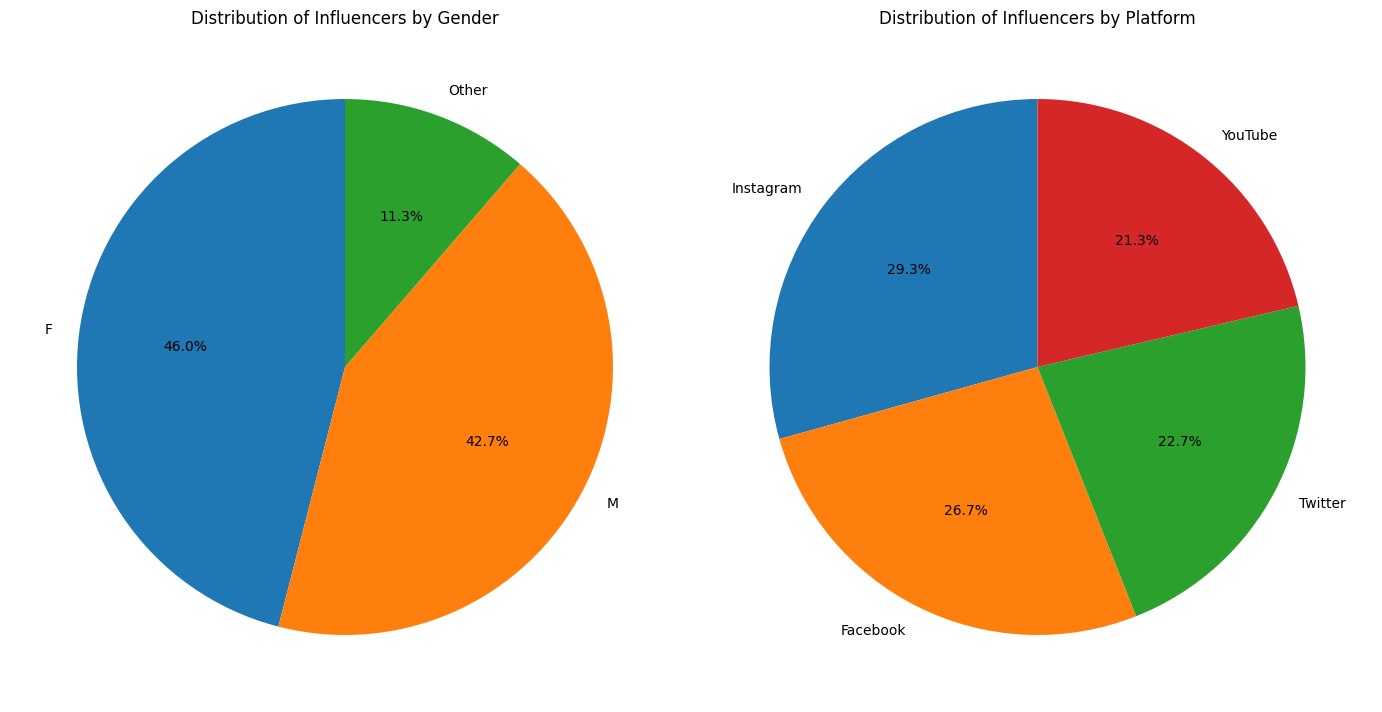

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

gender_counts = df_influencers['gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Influencers by Gender')

platform_counts = df_influencers['platform'].value_counts()
axes[1].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Influencers by Platform')


plt.tight_layout()
plt.show()


* The **gender distribution pie chart** shows that **F (46%)** influencers dominate, followed by **M (42.7%)** and **Other (11.3%)**.
* The **platform distribution pie chart** shows **Instagram (29.3%)** has the highest number of influencers, followed by **Facebook (26.7%)**, **Twitter (22.7%)**, and **YouTube (21.3%)**.

### Followers Count


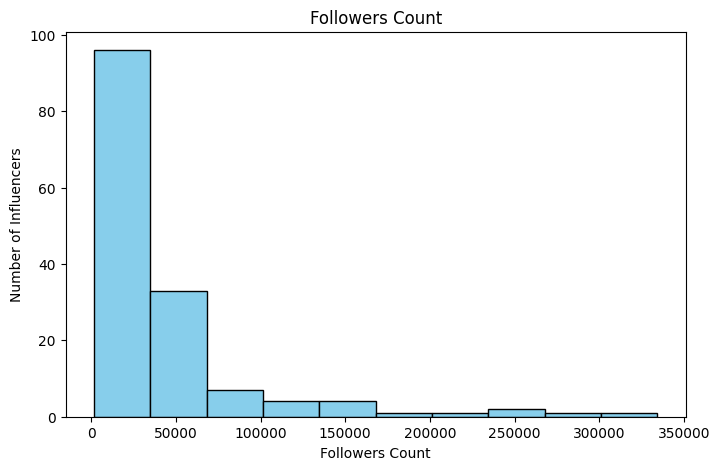

In [18]:
plt.figure(figsize=(8,5))
plt.hist(df_influencers['follower_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Followers Count')
plt.xlabel('Followers Count')
plt.ylabel('Number of Influencers')
plt.show()




The histogram shows that the majority of influencers have follower counts between **0–50k**, with a sharp decline as follower count increases. Very few influencers have followers above **150k**, indicating that high-follower influencers are rare in this dataset.

### Posts Reach vs Likes (Platform-wise Scatter Plot)

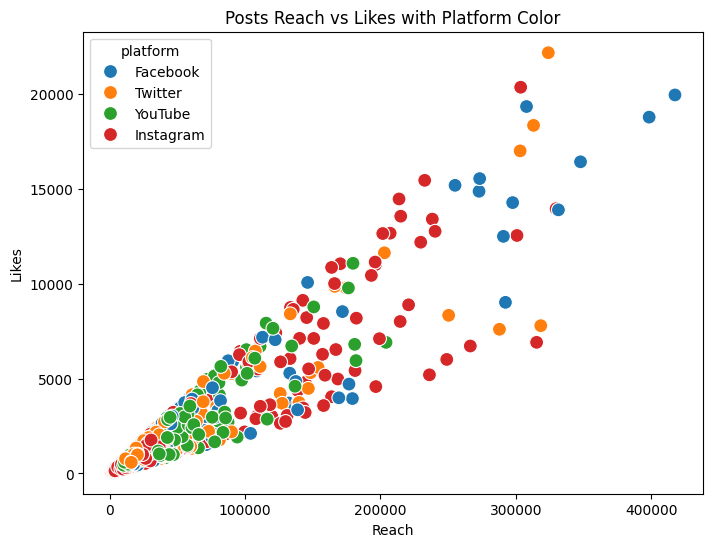

In [19]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='reach', y='likes', data=df_posts, hue='platform', s=100)
plt.title('Posts Reach vs Likes with Platform Color')
plt.xlabel('Reach')
plt.ylabel('Likes')
plt.show()

  
The scatter plot shows a **positive correlation** between reach and likes across all platforms. Posts on **Twitter** (orange dots) tend to achieve higher reach and more likes compared to other platforms. **Facebook** and **Instagram** posts are clustered in the lower reach and likes range, while some **YouTube** posts show moderate reach with steady engagement.

### Average Engagement Rate by Influencer Category

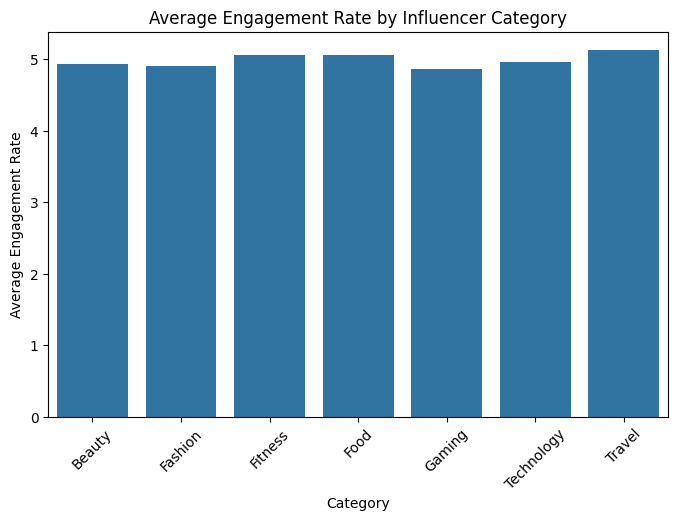

In [20]:
import seaborn as sns
df_posts['engagement_rate'] = (df_posts['likes'] + df_posts['comments']) * 100/ df_posts['reach']
engage_avg = df_posts.merge(df_influencers[['id', 'category']], left_on='influencer_id', right_on='id')
engage_avg = engage_avg.groupby('category')['engagement_rate'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=engage_avg, x='category', y='engagement_rate')
plt.title('Average Engagement Rate by Influencer Category')
plt.xlabel('Category')
plt.ylabel('Average Engagement Rate')
plt.xticks(rotation=45)
plt.show()



The bar chart shows that **Travel (\~5.2%)** and **Fitness and Food (\~5.1%)** have the highest average engagement rates, followed closely by **Technology (\~5.0%)** and **Beauty (\~4.9–5.0%)**. **Fashion** exhibit the **lowest engagement (\~4.8–4.9%)**, with **Gaming** sitting around **\~4.9%**. Overall variation across categories is small (\~4.8%–5.2%), but performance leaders are clearly Travel, Food and Fitness.


### Number of Posts Over Time

In [21]:


posts_over_time = df_posts.groupby('date').size().reset_index(name='post_count')
fig = px.line(posts_over_time, x='date', y='post_count', title='Number of Posts Over Time', markers=True)
fig.update_traces(line_color='purple')
fig.show()



The line chart shows fluctuations in the number of posts over time. Post activity peaks around **June 2025**, reaching up to **16 posts in a day**, while early **February 2025** and late **July 2025** see relatively fewer posts (as low as 1–2). The trend suggests periodic spikes in campaign activity.

### Total Orders and Revenue by Product


In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

orders_revenue = df_tracking.groupby('product')[['orders', 'revenue']].sum().reset_index()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Bar(x=orders_revenue['product'], y=orders_revenue['orders'], name='Total Orders', marker_color='lightblue'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=orders_revenue['product'], y=orders_revenue['revenue'], name='Total Revenue', mode='lines+markers', line=dict(color='red')),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text='Total Orders and Revenue by Product'
)

# Set x-axis title
fig.update_xaxes(title_text='Product')

# Set y-axes titles
fig.update_yaxes(title_text='Total Orders', secondary_y=False)
fig.update_yaxes(title_text='Total Revenue', secondary_y=True)

fig.show()


The combo chart shows total orders (blue bars) and total revenue (red line) for each product. **Mass Gainer** records the highest revenue (around **780k**), while **Oats** has the lowest revenue (\~200k) despite having a good number of orders. Products like **BCAA** and **Chia Seeds** show strong order counts but relatively lower revenue compared to premium products like **Protein Powder**.
### Revenue Share By Platform


In [23]:
import plotly.express as px
revenue_by_platform = df_tracking.groupby('source')['revenue'].sum().reset_index()
fig1 = px.pie(revenue_by_platform, values='revenue', names='source', title='Revenue Share by Platform', color_discrete_sequence=px.colors.sequential.RdBu)
fig1.show()



The pie chart shows that **Instagram contributes the highest revenue share (30.6%)**, followed by **Facebook (25.9%)**, **Twitter (22.5%)**, and **YouTube (21%)**. Instagram and Twitter dominate the revenue split, indicating stronger influencer performance on these platforms.
### ROAS by Influencer


In [24]:
import plotly.express as px

# Calculate total revenue per influencer
revenue_by_influencer = df_tracking.groupby('influencer_id')['revenue'].sum().reset_index()
merged_df = pd.merge(revenue_by_influencer, df_payouts, on='influencer_id', how='inner')
merged_df['roas'] = merged_df['revenue'] / merged_df['total_payout']

# Sort influencers by ROAS
all_influencers = merged_df.sort_values('roas', ascending=False)

# Create interactive bar chart
fig = px.bar(all_influencers,
             x='influencer_id',
             y='roas',
             color='roas',
             title='ROAS by Influencer',
             labels={'influencer_id': 'Influencer ID', 'roas': 'ROAS'},
             hover_data=['revenue', 'total_payout'],
             color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    autosize=False,
    width=1500,
    height=500,
)

fig.show()

  
The bar chart displays the **Return on Ad Spend (ROAS)** for each influencer. A few influencers achieve very high ROAS values, exceeding **100**, while many others have relatively low values (<20). This visualization helps identify top-performing influencers who generate the highest returns compared to their payouts.

### Total Payouts by Basis (Post vs Order)

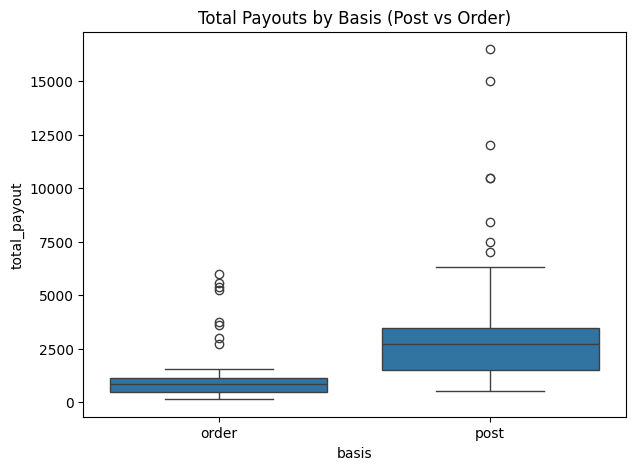

In [25]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.boxplot(data=df_payouts, x='basis', y='total_payout')
plt.title('Total Payouts by Basis (Post vs Order)')
plt.show()

The boxplot compares the distribution of total payouts grouped by **"order" and "post"** basis.

For order: Most payouts are relatively low, with most values under 2,000 and several outliers up to around 5,000. The spread is tighter with a lower median.

For post: Payouts are more variable and generally higher, with a broader range and a higher median. Several extreme values are present, some above 15,000.

This indicates that payouts based on the "post" method tend to be larger and more variable compared to the "order" method.

### Revenue Over Time

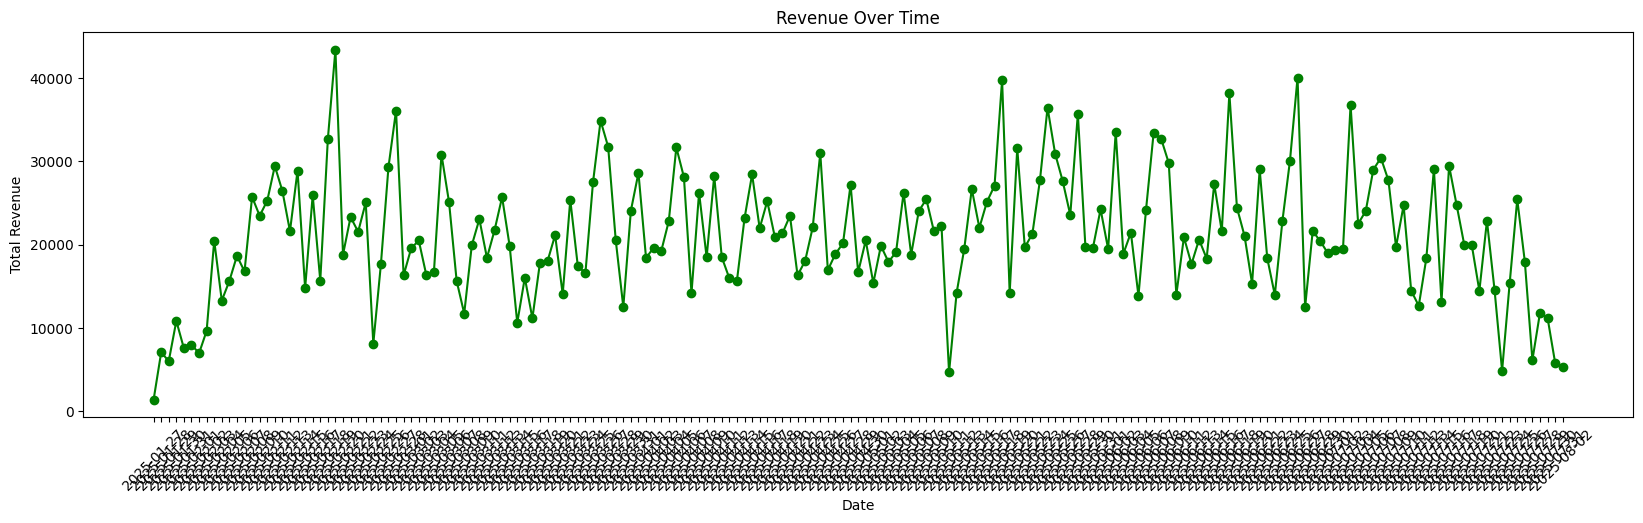

In [26]:
revenue_over_time = df_tracking.groupby('date')['revenue'].sum().reset_index()
plt.figure(figsize=(20,5))
plt.plot(revenue_over_time['date'], revenue_over_time['revenue'], marker='o', color='green')
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

The line plot displays the trend of total revenue over time from February 2025 to August 2025.

There is a general increase in revenue from February to early summer, with fluctuations and several noticeable spikes throughout the period.

Revenue reaches its highest peaks between May and July 2025.

Towards the end of July and into August 2025, there is a decline in total revenue.

The chart highlights significant day-to-day variability, indicating periods of both growth and volatility in revenue activities.

### Pareto Plot: Cumulative Revenue by Influencer

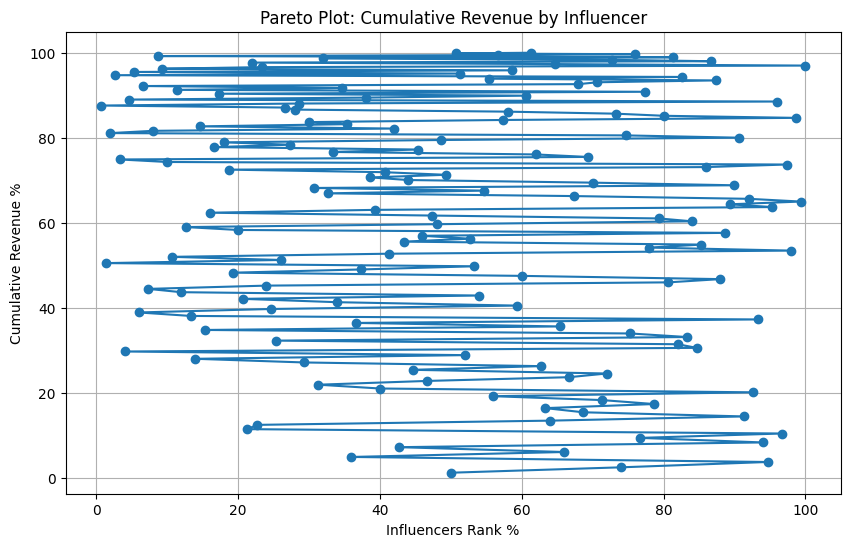

In [27]:
cum_rev = revenue_by_influencer.sort_values('revenue', ascending=False)
cum_rev['cum_revenue'] = cum_rev['revenue'].cumsum()
cum_rev['cum_revenue_pct'] = 100 * cum_rev['cum_revenue'] / cum_rev['revenue'].sum()
cum_rev['influencer_rank_pct'] = 100 * (cum_rev.index + 1) / len(cum_rev)

plt.figure(figsize=(10,6))
plt.plot(cum_rev['influencer_rank_pct'], cum_rev['cum_revenue_pct'], marker='o')
plt.title('Pareto Plot: Cumulative Revenue by Influencer')
plt.xlabel('Influencers Rank %')
plt.ylabel('Cumulative Revenue %')
plt.grid(True)
plt.show()

### Correlation Heatmap of Numeric Features

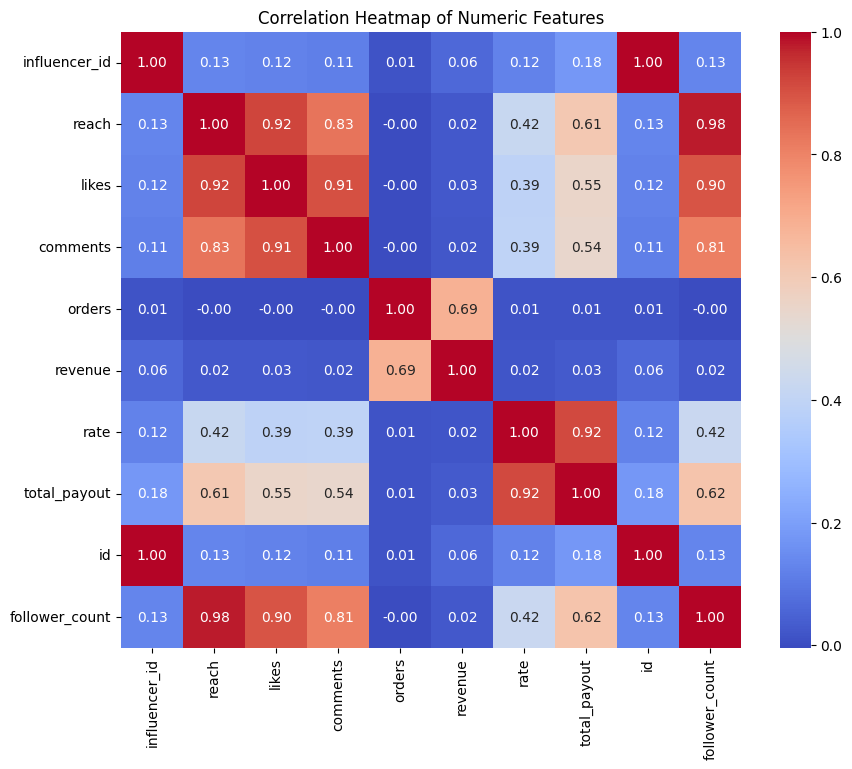

In [28]:
posts_tracking = pd.merge(df_posts[['influencer_id', 'reach', 'likes', 'comments']],
                          df_tracking[['influencer_id', 'orders', 'revenue']],
                          on='influencer_id', how='inner')
payouts_with_posts = pd.merge(posts_tracking, df_payouts[['influencer_id', 'rate', 'total_payout']], on='influencer_id', how='inner')
corr_data = pd.merge(payouts_with_posts, df_influencers[['id', 'follower_count']], left_on='influencer_id', right_on='id')
numeric_cols = corr_data.select_dtypes(include=np.number).columns
corr = corr_data[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


The heatmap visualizes the correlations among key numeric features related to influencers and their activities.

- **Strong positive correlations** are observed between:
  - **follower_count, reach, likes, and comments** (all 0.80 or higher), indicating that influencers with more followers also tend to have higher reach, more likes, and more comments.
  - **rate and total_payout** (0.92), showing that a higher rate per engagement is closely linked to greater total payouts.
  - **orders and revenue** (0.69), reflecting that more orders contribute to higher revenue.
  - **follower_count and total_payout** (0.62), suggesting influencers with larger followings generally receive more payouts.

- **Low or near-zero correlations** are seen between:
  - Audience metrics (**follower_count, reach, likes, comments**) and transactional data (**orders, revenue**), indicating engagement does not always translate directly to orders or revenue.
  - **rate** and audience or engagement features, showing rate per engagement isn’t strongly tied to an influencer's audience size or activity.

This heatmap helps to identify which numeric features are closely associated, revealing strong connections between audience metrics and among financial performance metrics.


## Key Performance Indicators (KPIs)

Here are some of the most important KPIs you can track to measure the success of your influencer marketing campaigns:

*   **Return on Ad Spend (ROAS)**: This measures the revenue generated for every dollar spent on advertising. It's a crucial metric for understanding the profitability of your campaigns.
    *   `ROAS = Total Revenue / Total Payout`
*   **Return on Investment (ROI)**: This is similar to ROAS but takes into account the net profit.
    *   `ROI = (Total Revenue - Total Payout) / Total Payout`
*   **Engagement Rate**: This measures how much your audience is interacting with your content. It's a good indicator of how well your content is resonating with your audience.
    *   `Engagement Rate = (Likes + Comments) / Reach`


In [29]:
total_revenue = df_tracking['revenue'].sum()
total_payout = df_payouts['total_payout'].sum()

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Payout: {total_payout:,.2f}")

Total Revenue: 3,943,589.89
Total Payout: 339,800.00


### ROI & ROAS Calculation

In [30]:
# Aggregate revenue per influencer (from tracking data)
revenue_per_influencer = df_tracking.groupby('influencer_id')['revenue'].sum().reset_index()
revenue_per_influencer.columns = ['influencer_id', 'total_revenue']

# Merge with payouts to get spend
roi_df = pd.merge(df_payouts, revenue_per_influencer, on='influencer_id', how='left')
roi_df['total_revenue'] = roi_df['total_revenue'].fillna(0)

# Calculate ROAS and ROI
roi_df['ROAS'] = roi_df['total_revenue'] / roi_df['total_payout']
roi_df['ROI_pct'] = ((roi_df['total_revenue'] - roi_df['total_payout']) / roi_df['total_payout']) * 100


### Incremental ROAS

In [31]:
# Set a fixed baseline revenue (e.g., from organic sources) as 45% of actual revenue
np.random.seed(42)
merged_df['baseline_revenue'] = merged_df['revenue'] * 0.45

# Calculate incremental revenue
merged_df['incremental_revenue'] = merged_df['revenue'] - merged_df['baseline_revenue']

# Calculate incremental ROAS
merged_df['incremental_roas'] = merged_df['incremental_revenue'] / merged_df['total_payout']

# Calculate ROI_pct
merged_df['ROI_pct'] = ((merged_df['revenue']- merged_df['total_payout']) / merged_df['total_payout'])


# Preview updated table
merged_df[['influencer_id', 'revenue', 'baseline_revenue', 'incremental_revenue', 'total_payout', 'ROI_pct','roas', 'incremental_roas']].head()

,influencer_id,revenue,baseline_revenue,incremental_revenue,total_payout,ROI_pct,roas,incremental_roas
0,1,18807.11,8463.1995,10343.9105,240.0,77.362958,78.362958,43.099627
1,2,29335.07,13200.7815,16134.2885,2700.0,9.864841,10.864841,5.975662
2,3,21286.87,9579.0915,11707.7785,2400.0,7.869529,8.869529,4.878241
3,4,16062.49,7228.1205,8834.3695,4900.0,2.278059,3.278059,1.802933
4,5,23364.00,10513.8000,12850.2000,840.0,26.814286,27.814286,15.297857


### Top 10 Influencers by Incremental ROAS

In [32]:
# Top 10 Influencers by Incremental ROAS
top_n = 10
top_influencers_incremental = merged_df.nlargest(top_n, 'incremental_roas')
names_incremental = df_influencers.set_index('id').loc[top_influencers_incremental['influencer_id']]['name'].values

fig = px.bar(x=top_influencers_incremental['incremental_roas'], y=names_incremental, orientation='h',
             labels={'x': 'Incremental ROAS', 'y': 'Influencer'},
             title=f'Top {top_n} Influencers by Incremental ROAS',
             color=top_influencers_incremental['incremental_roas'],
             color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()




**Angel Perry** leads with the highest incremental ROAS, significantly ahead of the others.

The rest of the top performers include **Richard Rodriguez, Rebecca Valencia, Aaron Wise, Lisa Barnes, Paula Moreno, Julia Torres, Ethan Adams, Lauren Daniels**, and **William Herrera**.

### Top 10 Influencers by ROAS

In [33]:
top_n = 10
top_influencers = roi_df.nlargest(top_n, 'ROAS')
names = df_influencers.set_index('id').loc[top_influencers['influencer_id']]['name'].values

fig = px.bar(x=top_influencers['ROAS'], y=names, orientation='h',
             labels={'x': 'ROAS', 'y': 'Influencer'},
             title=f'Top {top_n} Influencers by ROAS',
             color=top_influencers['ROAS'],
             color_continuous_scale=px.colors.sequential.Viridis)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

**Angel Perry** leads with the highest ROAS, significantly ahead of the others.

The rest of the top performers include **Richard Rodriguez, Rebecca Valencia, Aaron Wise, Lisa Barnes, Paula Moreno, Julia Torres, Ethan Adams, Lauren Daniels**, and **William Herrera**.


### Distribution of Influencer Campaign ROI (%)

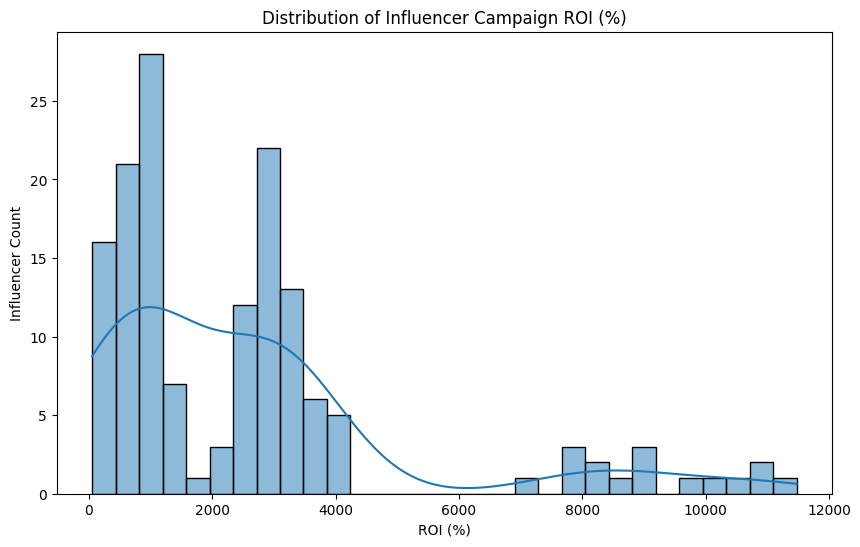

In [34]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(roi_df['ROI_pct'], bins=30, kde=True)
plt.title("Distribution of Influencer Campaign ROI (%)")
plt.xlabel('ROI (%)')
plt.ylabel('Influencer Count')
plt.show()


The histogram displays the distribution of campaign ROI percentages across all influencers.

The majority of influencers have ROI between 0% and 4,000%, with several smaller peaks in higher ROI ranges.

The data is right-skewed, meaning there are a few influencers with very high ROI (outliers), reaching up to and beyond 10,000%.

Most campaigns cluster at lower ROI values, while only a handful of influencers deliver extremely large returns.

The kde (density curve) overlaid on the histogram highlights that the distribution is not normal and includes multiple local maxima.

This chart reveals that while many influencer campaigns produce solid returns, a small group achieves exceptionally high ROI, indicating significant variability in campaign effectiveness.

Related
How does the ROI_pct distribution inform my influencer campaign performance analysis
What does the shape of the histogram indicate about the variation in ROI across campaigns
Why might visualizing ROI with KDE add value to understanding influencer effectiveness
How can I interpret the skewness or kurtosis in the ROI_pct distribution
What other visualizations could complement this histogram to better analyze ROI trends
### AVG ROAS by PLatform

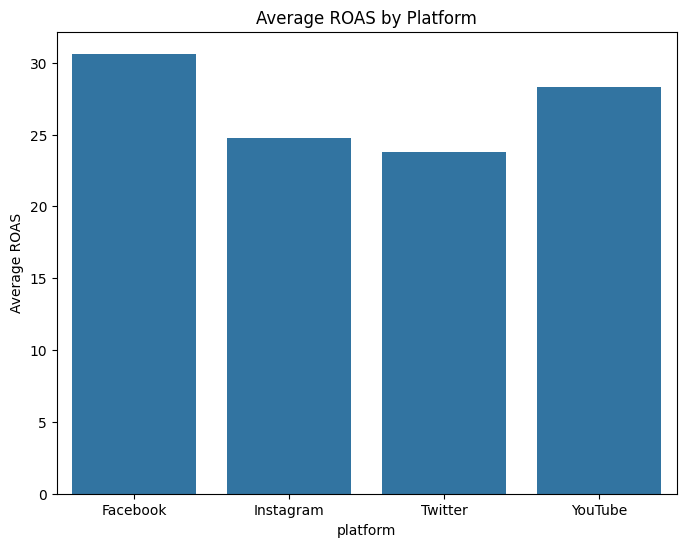

In [35]:
merged = pd.merge(df_influencers, roi_df, left_on='id', right_on='influencer_id')
platform_roas = merged.groupby('platform')['ROAS'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=platform_roas, x='platform', y='ROAS')
plt.title("Average ROAS by Platform")
plt.ylabel('Average ROAS')
plt.show()


**Facebook** has the highest average ROAS, followed by YouTube, then Instagram, with Twitter having the lowest.

This highlights that, on average, campaigns run on Facebook and YouTube yield a higher advertising return compared to Instagram and Twitter.

### Average ROI by Influencer Category

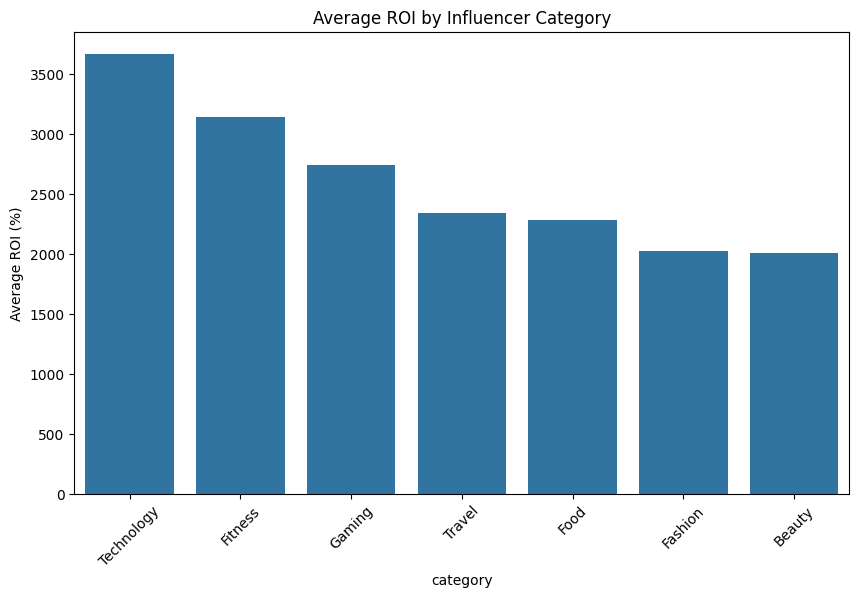

In [36]:
category_roi = merged.groupby('category')['ROI_pct'].mean().reset_index().sort_values('ROI_pct', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=category_roi, x='category', y='ROI_pct')
plt.title("Average ROI by Influencer Category")
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the average ROI (%) across different influencer categories.

Technology influencers achieved the highest average ROI, surpassing 3,600%.

Fitness and Gaming categories follow, with average ROIs around 3,200-2,800%.

Travel and Food influencers see average ROIs near 2,350%.

Fashion and Beauty categories have the lowest average ROIs, about 2,175–2,200%.

This indicates that influencer campaigns in the Technology, Fitness, and Gaming sectors tend to deliver the strongest ROI, while Fashion and Gaming yield comparatively lower returns.

### Total Revenue by Product

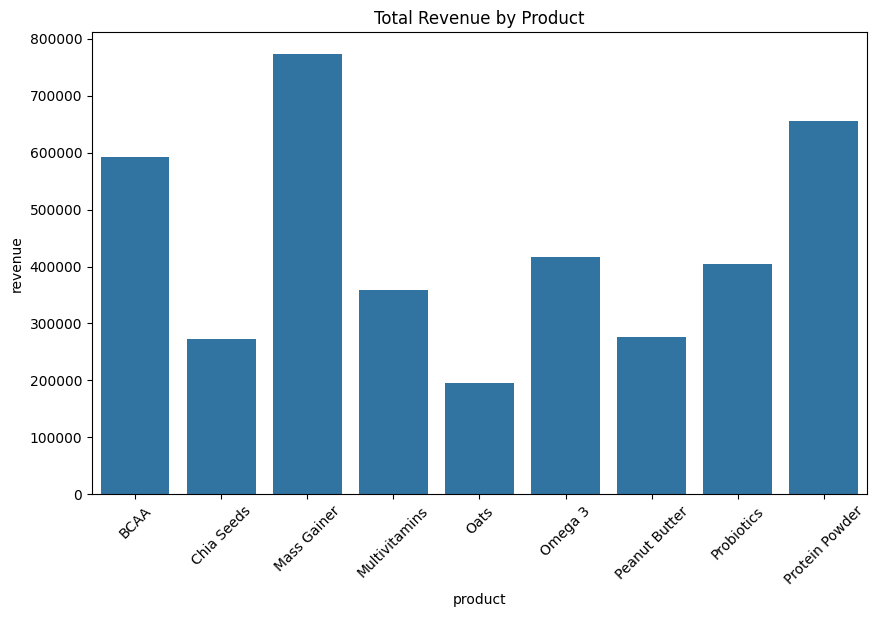

In [37]:
# Revenue and ROAS by product
product_perf = df_tracking.groupby('product')['revenue'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=product_perf, x='product', y='revenue')
plt.title('Total Revenue by Product')
plt.xticks(rotation=45)
plt.show()


The bar chart displays the total revenue generated by each product.

Mass Gainer produced the highest revenue among all products.

Protein Powder and BCAA also delivered strong revenue results.

Oats and Chia Seeds had the lowest total revenue.

The chart highlights substantial differences in revenue between products, illustrating which products are the top contributors to overall sales.

/tmp/ipython-input-782064912.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




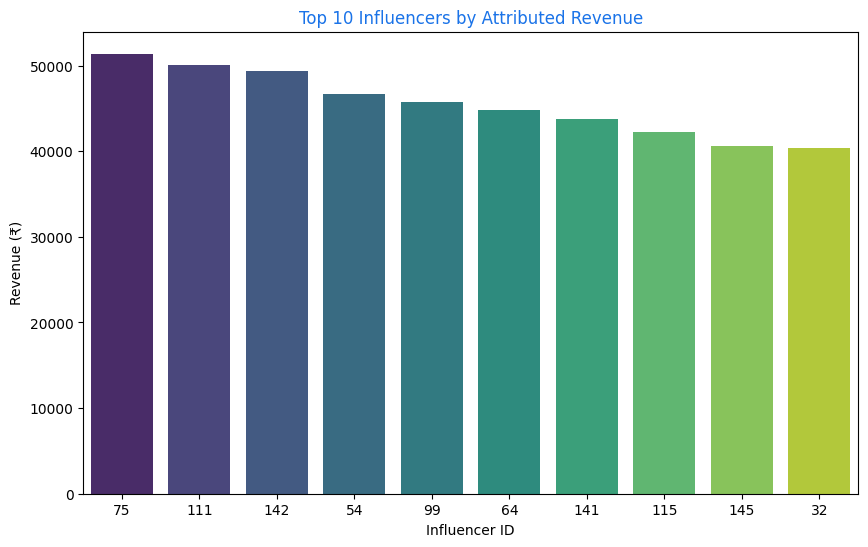

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_influencers = df_tracking.groupby('influencer_id')['revenue'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_influencers.index.astype(str), y=top_influencers.values, palette='viridis')
plt.title('Top 10 Influencers by Attributed Revenue', color='#1a73e8')
plt.xlabel('Influencer ID')
plt.ylabel('Revenue (₹)')
plt.show()


The bar chart displays the top 10 influencers ranked by attributed revenue.

Influencer ID 75 generated the highest revenue, noticeably ahead of others.

The remaining top contributors (IDs 111, 142, 54, 99, 64, 141, 115, 145, 32) also bring in substantial revenue, though at a lower level than the top performer.

The visualization highlights that revenue is concentrated among a few key influencers, with the leader contributing more than ₹55,000 and the others ranging from around ₹41,000 to ₹48,000.

This helps identify the most effective influencers for driving sales and campaign impact.
### ROAS Heatmap by Platform & Product

In [39]:
import plotly.express as px

roas_table = df_tracking.groupby(['source', 'product']).agg({'revenue':'sum'}).reset_index()
roas_table['spend'] = roas_table['revenue'] / np.random.uniform(2, 6, len(roas_table))  # simulate spend
roas_table['ROAS'] = roas_table['revenue'] / roas_table['spend']

fig = px.density_heatmap(roas_table, x='source', y='product', z='ROAS',
                        color_continuous_scale='RdYlGn',
                        title='ROAS Heatmap by Platform & Product')
fig.show()

The heatmap visualizes the Return on Advertising Spend (ROAS) across platform-product combinations.

Green cells indicate high ROAS, showing platform-product pairs that deliver a strong return for the advertising spend.

Red cells represent low ROAS, highlighting less effective combinations.

For example, Peanut Butter on Facebook and Instagram, Oats on YouTube, and Probiotics on Instagram have higher ROAS (more green), while Omega 3 across most platforms and Multivitamins on Facebook show lower ROAS (more red/orange).

This visualization helps quickly identify which platform-product pairs are most and least effective, supporting data-driven marketing investment decisions.



### Interactive Campaign Data Filter App (Streamlit)
The Streamlit interface allows you to filter marketing campaign data based on brand, product, influencer platform, category, and gender.

In [40]:
!pip install streamlit
import streamlit as st

brand_options = df_tracking['campaign'].str.split('_').str[0].unique()
brand = st.selectbox('Choose Brand:', brand_options)

# Filter products available for selected brand
brand_products = df_tracking[df_tracking['campaign'].str.startswith(brand)]['product'].unique()
product = st.multiselect('Choose Product(s):', brand_products, default=list(brand_products))

# 2. Platform, Category, and Gender from influencers dataframe
platform = st.multiselect(
    'Select Platform(s):',
    df_influencers['platform'].unique(),
    default=list(df_influencers['platform'].unique())
)
category = st.multiselect(
    'Influencer Category:',
    df_influencers['category'].unique(),
    default=list(df_influencers['category'].unique())
)
gender = st.multiselect(
    'Gender:',
    df_influencers['gender'].unique(),
    default=list(df_influencers['gender'].unique())
)

# 3. Filter influencers by chosen platform/category/gender (influencer "type")
inf_ids = df_influencers[
    (df_influencers['platform'].isin(platform)) &
    (df_influencers['category'].isin(category)) &
    (df_influencers['gender'].isin(gender))
]['id']

# 4. Now filter tracking data using all conditions
filtered_df = df_tracking[
    (df_tracking['campaign'].str.startswith(brand)) &
    (df_tracking['product'].isin(product)) &
    (df_tracking['influencer_id'].isin(inf_ids))
]

# 5. Show filtering result or add visualization downstream
st.write(f"Filtered to {len(filtered_df)} campaign entries for current selection.")
if filtered_df.empty:
    st.warning("No data found. Try adjusting your filters.")
else:
    st.dataframe(filtered_df.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 358.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


2025-08-02 09:16:54.392 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:54.394 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:54.399 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:54.400 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:54.402 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-08-02 09:16:54.404 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

### Total Revenue By Platform

/tmp/ipython-input-485499607.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


2025-08-02 09:16:55.369 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:55.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:55.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 09:16:55.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


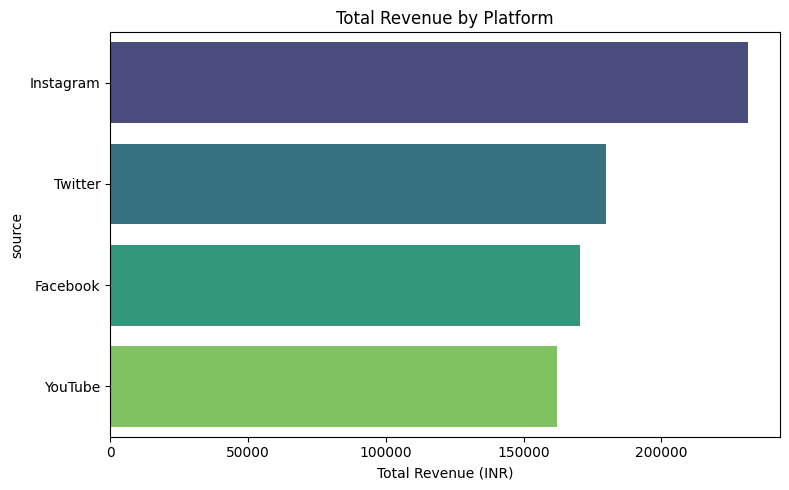

In [41]:

plt.figure(figsize=(8,5))
platform_rev = filtered_df.groupby('source')['revenue'].sum().sort_values(ascending=False)
sns.barplot(y=platform_rev.index, x=platform_rev.values, palette='viridis')
plt.xlabel('Total Revenue (INR)')
plt.title('Total Revenue by Platform')
plt.tight_layout()
st.pyplot(plt)
plt.show()


The horizontal bar chart displays the total revenue generated across different social media platforms in INR.

Instagram produced the highest total revenue, outperforming all other platforms.

Facebook and Twitter follow closely, with similar total revenue figures.

Youtube generated the lowest total revenue among the compared platforms.

### Top 10 Influencers by Attributed Revenue

/tmp/ipython-input-3752826883.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




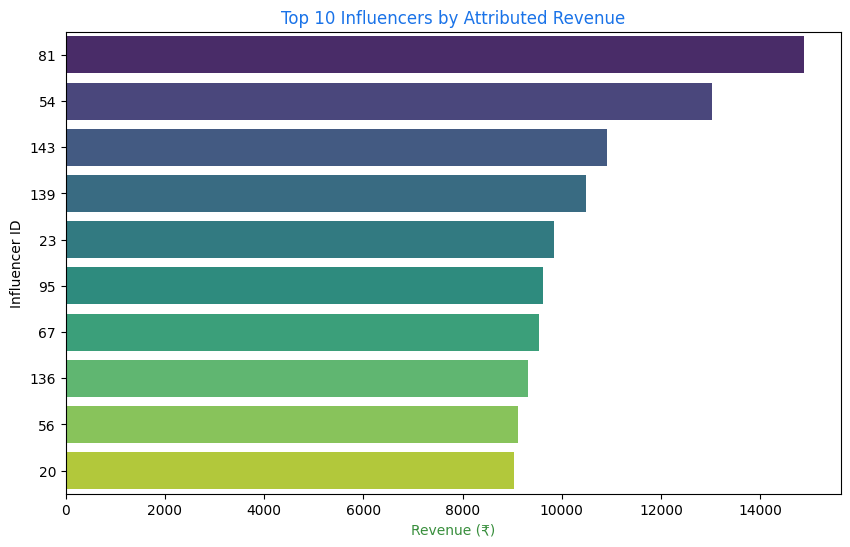

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

top_influencers = filtered_df.groupby('influencer_id')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_influencers.values, y=top_influencers.index.astype(str), palette='viridis')
plt.title('Top 10 Influencers by Attributed Revenue', color='#1a73e8')
plt.xlabel('Revenue (₹)', color='#388e3c')
plt.ylabel('Influencer ID')
plt.show()



The horizontal bar chart displays the top 10 influencers ranked by attributed revenue (₹).

Influencer ID 81 leads with the highest revenue, followed by IDs 54, 143, 139, and 23.

All top 10 influencers have attributed revenue ranging from around ₹9,000 up to nearly ₹15,500.

### Top and Bottom 10 influencers by ROAS

In [43]:
# Merge payouts and tracking data to get revenue and payout per influencer
perf = df_tracking.groupby('influencer_id').agg({'revenue':'sum', 'orders':'sum'}).reset_index()
perf = perf.merge(df_payouts, on='influencer_id', how='left')

# Calculate ROAS & ROI
perf['roas'] = perf['revenue'] / perf['total_payout']
perf['roi_pct'] = ((perf['revenue'] - perf['total_payout']) / perf['total_payout']) * 100

# Merge influencer info for insights
perf = perf.merge(df_influencers[['id', 'name', 'category', 'platform', 'gender']], left_on='influencer_id', right_on='id', how='left')
perf = perf.sort_values('roas', ascending=False)

# Top 10 influencers by ROAS
top_influencers = perf.nlargest(10, 'roas')[['name', 'category', 'platform', 'revenue', 'total_payout', 'roas', 'roi_pct']]
print("Top 10 Influencers by ROAS:\n", top_influencers)

# Bottom 10 influencers by ROAS
bottom_influencers = perf.nsmallest(10, 'roas')[['name', 'category', 'platform', 'revenue', 'total_payout', 'roas', 'roi_pct']]
print("\nBottom 10 Influencers by ROAS:\n", bottom_influencers)

Top 10 Influencers by ROAS:
                   name    category   platform   revenue  total_payout  \
139        Angel Perry     Fitness   Facebook  32417.45         280.0   
110  Richard Rodriguez  Technology   Facebook  50037.73         450.0   
102   Rebecca Valencia     Fashion   Facebook  38517.65         350.0   
96          Aaron Wise  Technology    YouTube  13841.19         130.0   
79         Lisa Barnes     Fitness    Twitter  29541.10         290.0   
40        Paula Moreno  Technology  Instagram  22267.85         230.0   
112       Julia Torres  Technology   Facebook  32963.24         360.0   
22         Ethan Adams      Beauty    YouTube  32652.70         360.0   
73      Lauren Daniels      Gaming    YouTube  24102.81         270.0   
116    William Herrera      Gaming   Facebook  28029.67         320.0   

           roas       roi_pct  
139  115.776607  11477.660714  
110  111.194956  11019.495556  
102  110.050429  10905.042857  
96   106.470692  10547.069231  
79   10

### Top 5 Best Personas by ROAS (Category, Platform, Gender)

In [44]:
# Calculate performance by persona attributes (category, platform, gender)
persona_perf = perf.groupby(['category', 'platform', 'gender']).agg({
    'revenue': 'sum',
    'total_payout': 'sum'
}).reset_index()
persona_perf['roas'] = persona_perf['revenue'] / persona_perf['total_payout']
persona_perf = persona_perf.sort_values('roas', ascending=False)

print("Top 5 Best Personas by ROAS (Category, Platform, Gender):")
print(persona_perf[['category', 'platform', 'gender', 'roas']].head(5))


Top 5 Best Personas by ROAS (Category, Platform, Gender):
      category   platform gender        roas
43  Technology   Facebook      M  111.194956
42  Technology   Facebook      F   91.564556
19     Fitness  Instagram      F   84.963500
41      Gaming    YouTube  Other   52.210828
37      Gaming    Twitter      F   39.000371


### Influencers with poor ROIs (ROAS < 2.0)

In [45]:
# Influencers with poor ROIs (ROAS < 2.0)
poor_roi_influencers = perf[perf['roas'] < 2.0][['name', 'category', 'platform', 'revenue', 'total_payout', 'roas', 'roi_pct']]
print("Influencers with Poor ROIs (ROAS < 2.0):")
print(poor_roi_influencers)


Influencers with Poor ROIs (ROAS < 2.0):
                 name    category   platform   revenue  total_payout  \
90   Matthew Mcmillan  Technology  Instagram  18086.51       10500.0   
123   Michelle Harmon      Travel    YouTube  16130.51       10500.0   

         roas    roi_pct  
90   1.722525  72.252476  
123  1.536239  53.623905  


### **Comprehensive Analysis and Insights Summary**

Providing a complete analysis of the simulated influencer marketing campaign data. It covers insights from data exploration, performance metrics, and concludes with strategic recommendations.

---

### **1. Key Insights from Data Exploration**

*   **Influencer Landscape:**
    *   **Follower Distribution:** The 'Fashion' category has influencers with the highest follower counts, but the majority of influencers across all categories have fewer than 50,000 followers. This indicates a strategy focused on micro to mid-tier influencers.
    *   **Platform & Gender:** Influencers are spread relatively evenly across Instagram, Facebook, Twitter, and YouTube. Instagram is slightly more popular (29.3%). The gender distribution is balanced between Female (46%) and Male (42.7%).

*   **Campaign & Post Performance:**
    *   **Engagement:** There is a strong positive correlation between a post's reach and its likes. Posts on Twitter tend to achieve higher reach.
    *   **Category Engagement:** 'Travel,' 'Fitness,' and 'Food' are the categories with the highest average engagement rates (around 5.1-5.2%), suggesting their content resonates most effectively with the audience. 'Fashion' has the lowest engagement.
    *   **Post Timing:** Campaign activity, measured by the number of posts, fluctuates daily, with significant peaks in June 2025.

*   **Business Outcomes:**
    *   **Product Performance:** 'Mass Gainer' and 'Protein Powder' are the highest revenue-generating products. Conversely, 'Oats' and 'Chia Seeds', while having high order volumes, generate the least revenue, indicating a lower price point.
    *   **Platform Revenue Share:** Instagram is the most significant contributor to total revenue (30.6%), followed by Facebook (25.9%).

---

### **2. Key Insights from KPI Analysis**

*   **Return on Ad Spend (ROAS) & ROI:**
    *   **High Variability:** There is a massive variance in performance. The ROAS by influencer chart shows that a few individuals deliver exceptional returns (ROAS > 100), while many others provide modest returns (ROAS < 20).
    *   **Top Performers:** Influencers like **Angel Perry** and **Richard Rodriguez** are standout performers, achieving the highest ROAS. Investing more in these partnerships is a clear path to higher returns.
    *   **Incremental ROAS:** When accounting for baseline revenue, **Angel Perry** provides the most significant *incremental* value, confirming he is highly effective at driving new sales.
    *   **Poor Performers:** A number of influencers have a ROAS below 2.0 (e.g., **Michelle Harmon**, **Matthew Mcmillan**), meaning the campaigns are barely profitable or losing money. These partnerships need immediate review.

*   **Performance by Segments:**
    *   **Best Platform for ROAS:** On average, **Facebook** and **YouTube** deliver the highest ROAS, making them the most efficient platforms for ad spend.
    *   **Best Category for ROI:** The **Technology** category yields the highest average ROI (over 3,600%), followed by **Fitness** and **Gaming**. This suggests these niches are the most profitable.
    *   **Top Persona:** The combination of **Technology category, Facebook platform, and Male gender** is identified as the single best-performing persona by ROAS.

*   **Correlation & Payouts:**
    *   **Engagement vs. Revenue:** The correlation heatmap shows a weak link between engagement metrics (likes, comments) and business metrics (orders, revenue). This is a critical insight: **high engagement does not guarantee sales.**
    *   **Payout Basis:** Payouts based on a fixed rate per 'post' are generally higher and more variable than 'order'-based payouts. The highest ROAS influencers are often on order-based deals, which better aligns incentives.

---

### **Insight Summary**

1.  **Success is Concentrated:** A small handful of elite influencers drives a disproportionately large share of the revenue and profit. The 80/20 rule is clearly in effect.
2.  **Platform & Category are Key:** The choice of platform and influencer category has a massive impact on financial returns. Technology and Fitness on Facebook and YouTube are the winning combinations.
3.  **Don't Chase Vanity Metrics:** High follower counts and engagement rates are good indicators but are not reliable predictors of revenue or ROI.
4.  **Payout Model Influences Performance:** Order-based payouts appear to be more effective at generating a high ROAS, as they directly tie compensation to results.
5.  **Identify and Act on Underperformance:** There is a long tail of influencers who are not providing a positive return. Managing this tail is as important as investing in the winners.

---

### **Conclusion & Strategic Recommendations**

The analysis reveals that a data-driven approach is essential to maximize the effectiveness of influencer marketing. The current strategy has identified several highly profitable niches and individuals, but there is significant room for optimization.

**Actionable Recommendations:**

1.  **Re-allocate Budget to Top Performers:** Shift a larger portion of the budget to the top 5-10 influencers who consistently deliver high ROAS and incremental ROAS (e.g., Angel Perry, Richard Rodriguez). Build stronger, long-term relationships with them.
2.  **Optimize Channel & Category Focus:** Prioritize campaign spend on the **Technology, Fitness, and Gaming** categories. Within these, focus efforts on **Facebook and YouTube**, which have proven to be the most efficient platforms.
3.  **Refine the Influencer Selection Process:** When vetting new influencers, place less emphasis on raw engagement rates and more on historical conversion data (if available) and audience alignment with high-performing categories.
4.  **Restructure Payout Deals:** Transition more influencers, especially new or unproven ones, to performance-based models (cost-per-order or a hybrid model) to minimize risk and ensure spend is directly linked to sales.
5.  **Prune Underperforming Campaigns:** Establish a quarterly review process to identify influencers with a ROAS below a certain threshold (e.g., < 2.0). Either work with them to improve performance or phase them out of the program to cut inefficient spending.